# Average stats for team for each season aproach 

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!ls

championat.com.ipynb              russian_premier_league_scores.csv
model_1.ipynb                     this_season_rpl.xlsx
model_2_average_stats.ipynb


In [3]:
data = pd.read_csv('russian_premier_league_scores.csv')

In [4]:
data

,home,away,score,year
0,Зенит,Спартак М,3 : 1,2020/2021
1,Зенит,Локомотив М,6 : 1,2020/2021
2,Зенит,Рубин,1 : 2,2020/2021
3,Зенит,Сочи,3 : 1,2020/2021
4,Зенит,ЦСКА,2 : 1,2020/2021
...,...,...,...,...
6853,Динамо-Газовик,Текстильщик Км,0 : 2,1992
6854,Динамо-Газовик,Уралмаш,2 : 3,1992
6855,Динамо-Газовик,Океан,3 : 3,1992
6856,Динамо-Газовик,Факел,0 : 1,1992


In [5]:
data[['home_goals', 'away_goals']] = data.score.str.split(':', expand=True)

In [6]:
data.home_goals = data.home_goals.astype('int')
data.away_goals = data.away_goals.astype('int')
year_start = []
year_end = []
for year in data.year:
    if '/' in year:
        year_start.append(year.split('/')[0])
        year_end.append(year.split('/')[1])
    else:
        year_start.append(year)
        year_end.append(year)
data['year_start'] = year_start
data['year_end'] = year_end

In [7]:
data

,home,away,score,year,home_goals,away_goals,year_start,year_end
0,Зенит,Спартак М,3 : 1,2020/2021,3,1,2020,2021
1,Зенит,Локомотив М,6 : 1,2020/2021,6,1,2020,2021
2,Зенит,Рубин,1 : 2,2020/2021,1,2,2020,2021
3,Зенит,Сочи,3 : 1,2020/2021,3,1,2020,2021
4,Зенит,ЦСКА,2 : 1,2020/2021,2,1,2020,2021
...,...,...,...,...,...,...,...,...
6853,Динамо-Газовик,Текстильщик Км,0 : 2,1992,0,2,1992,1992
6854,Динамо-Газовик,Уралмаш,2 : 3,1992,2,3,1992,1992
6855,Динамо-Газовик,Океан,3 : 3,1992,3,3,1992,1992
6856,Динамо-Газовик,Факел,0 : 1,1992,0,1,1992,1992


In [8]:
for team in ['Спартак М', 'Локомотив М', 'Динамо М']:
    data[data.home == team].home = team[:-2]
    data[data.away == team].away = team[:-2]

In [9]:
data.home = pd.Categorical(data.home)
data.away = pd.Categorical(data.away)
data['home_codes'] = data.home.cat.codes
data['away_codes'] = data.away.cat.codes

In [10]:
data

,home,away,score,year,home_goals,away_goals,year_start,year_end,home_codes,away_codes
0,Зенит,Спартак М,3 : 1,2020/2021,3,1,2020,2021,13,39
1,Зенит,Локомотив М,6 : 1,2020/2021,6,1,2020,2021,13,21
2,Зенит,Рубин,1 : 2,2020/2021,1,2,2020,2021,13,31
3,Зенит,Сочи,3 : 1,2020/2021,3,1,2020,2021,13,36
4,Зенит,ЦСКА,2 : 1,2020/2021,2,1,2020,2021,13,57
...,...,...,...,...,...,...,...,...,...,...
6853,Динамо-Газовик,Текстильщик Км,0 : 2,1992,0,2,1992,1992,10,43
6854,Динамо-Газовик,Уралмаш,2 : 3,1992,2,3,1992,1992,10,53
6855,Динамо-Газовик,Океан,3 : 3,1992,3,3,1992,1992,10,26
6856,Динамо-Газовик,Факел,0 : 1,1992,0,1,1992,1992,10,55


In [11]:
dataset = data.copy(deep=False)

In [12]:
dataset.drop(columns=['home', 'away', 'year', 'score'], inplace=True)

In [13]:
dataset

,home_goals,away_goals,year_start,year_end,home_codes,away_codes
0,3,1,2020,2021,13,39
1,6,1,2020,2021,13,21
2,1,2,2020,2021,13,31
3,3,1,2020,2021,13,36
4,2,1,2020,2021,13,57
...,...,...,...,...,...,...
6853,0,2,1992,1992,10,43
6854,2,3,1992,1992,10,53
6855,3,3,1992,1992,10,26
6856,0,1,1992,1992,10,55


<li>Average goals</li>
<li>Average home_goals</li>
<li>Average home_loses</li>
<li>Average wins</li>
<li>Average loses</li>
<li>Average draws</li>

In [150]:
mean_goals = dataset.groupby(['home_codes', 'year_start', 'year_end']).mean().reset_index()

In [151]:
dataset

,home_goals,away_goals,year_start,year_end,home_codes,away_codes
0,3,1,2020,2021,13,39
1,6,1,2020,2021,13,21
2,1,2,2020,2021,13,31
3,3,1,2020,2021,13,36
4,2,1,2020,2021,13,57
...,...,...,...,...,...,...
6853,0,2,1992,1992,10,43
6854,2,3,1992,1992,10,53
6855,3,3,1992,1992,10,26
6856,0,1,1992,1992,10,55


In [154]:
#mean_goals.drop(columns=['away_codes'], inplace=True)
mean_goals['away_codes'] = dataset.groupby(by=['home_codes', 'year_start', 'year_end']).sum().reset_index().away_codes

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

regr = RandomForestRegressor(criterion='mse', n_estimators=100, random_state=8, max_depth=5)

In [169]:
preds = []
mean_goals.columns = ['team', 'year_start', 'year_end', 'home_scored', 'home_passed', 'away_codes']

In [170]:
mean_goals

,team,year_start,year_end,home_scored,home_passed,away_codes
0,0,1996,1996,1.882353,0.941176,535.0
1,0,1997,1997,1.882353,0.941176,535.0
2,0,1998,1998,1.933333,0.866667,493.0
3,0,1999,1999,2.600000,1.200000,491.0
4,0,2000,2000,1.466667,1.066667,477.0
...,...,...,...,...,...,...
453,59,2003,2003,1.733333,0.800000,518.0
454,59,2004,2004,1.266667,0.800000,362.0
455,59,2005,2005,1.266667,1.133333,403.0
456,59,2006,2006,0.666667,1.866667,424.0


**home scored prediction**

In [34]:
X = mean_goals.drop(columns=['home_scored'])
y = y=mean_goals.home_scored
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, test_size=0.33)


In [37]:
regr.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=8)

In [171]:
new_season = pd.read_csv('rpl_this_season_matches.csv')

**match codes from dataset with new season**

In [172]:
data[data.home =='Алания']

,home,away,score,year,home_goals,away_goals,year_start,year_end,home_codes,away_codes
2460,Алания,Зенит,1 : 3,2010,1,3,2010,2010,0,13
2461,Алания,ЦСКА,1 : 3,2010,1,3,2010,2010,0,57
2462,Алания,Рубин,1 : 1,2010,1,1,2010,2010,0,31
2463,Алания,Спартак,5 : 2,2010,5,2,2010,2010,0,37
2464,Алания,Локомотив,0 : 0,2010,0,0,2010,2010,0,20
...,...,...,...,...,...,...,...,...,...,...
5841,Алания,Жемчужина-Сочи,4 : 1,1996,4,1,1996,1996,0,12
5842,Алания,Тюмень,0 : 0,1996,0,0,1996,1996,0,50
5843,Алания,Факел,2 : 0,1996,2,0,1996,1996,0,55
5844,Алания,Локомотив НН,3 : 1,1996,3,1,1996,1996,0,22


In [173]:
team_codes = {v:k for k,v in enumerate(data.home.cat.categories)}

In [174]:
new_season.home.unique()
new_season.home = new_season.home.apply(lambda x: x[:-1])
new_season.away = new_season.away.apply(lambda x: x[1:])
new_season.home[new_season.home == 'Арсенал Т'] = "Арсенал"
new_season.away[new_season.away == 'Арсенал Т'] = "Арсенал"
new_season['home_codes'] = new_season.home.map(team_codes)
new_season['away_codes'] = new_season.away.map(team_codes)

In [175]:
new_season[new_season.home_codes.isna()].home_codes = 60

In [176]:
new_season[new_season.away_codes.isna()].away_codes = 60

In [177]:
new_season.home_codes.fillna(60, inplace=True)
new_season.away_codes.fillna(60, inplace=True)

In [178]:
new_season['year_start'] = 2021
new_season['year_end'] = 2020

In [180]:
mean_goals.drop(columns=['home_passed'], inplace=True)
mean_goals

,team,year_start,year_end,home_scored,away_codes
0,0,1996,1996,1.882353,535.0
1,0,1997,1997,1.882353,535.0
2,0,1998,1998,1.933333,493.0
3,0,1999,1999,2.600000,491.0
4,0,2000,2000,1.466667,477.0
...,...,...,...,...,...
453,59,2003,2003,1.733333,518.0
454,59,2004,2004,1.266667,362.0
455,59,2005,2005,1.266667,403.0
456,59,2006,2006,0.666667,424.0


In [187]:
mean_goals

,team,year_start,year_end,home_scored,away_codes
0,0,1996,1996,1.882353,535.0
1,0,1997,1997,1.882353,535.0
2,0,1998,1998,1.933333,493.0
3,0,1999,1999,2.600000,491.0
4,0,2000,2000,1.466667,477.0
...,...,...,...,...,...
453,59,2003,2003,1.733333,518.0
454,59,2004,2004,1.266667,362.0
455,59,2005,2005,1.266667,403.0
456,59,2006,2006,0.666667,424.0


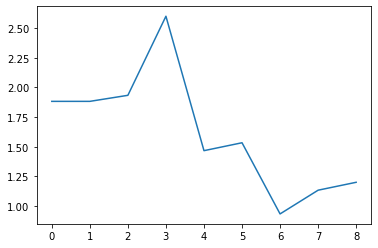

In [197]:
mean_goals[mean_goals.team == 0].home_scored.plot()

In [183]:
new_mean_goals = new_season.drop(columns=['home','away']).groupby(['home_codes','year_start', 'year_end']).mean().reset_index()
new_mean_goals.away_codes = new_mean_goals.groupby(['home_codes', 'year_start', 'year_end']).sum().reset_index().away_codes

In [188]:
X = mean_goals.drop(columns=['home_scored'])
y = mean_goals.home_scored
mean_train, mean_test, y_mean_train, y_mean_test =  train_test_split(X,y ,random_state = 8, test_size=0.33)

In [189]:
regr.fit(mean_train, y_mean_train)

RandomForestRegressor(max_depth=5, random_state=8)

In [193]:
mean_pred = regr.predict(mean_test)

In [196]:
mean_absolute_error(y_mean_test, mean_pred), mean_squared_error(y_mean_test, mean_pred)

(0.3082186818712745, 0.15202438311261227)

In [201]:
mean_pred = regr.predict(new_mean_goals)

In [202]:
preds = {}
preds['mean_home_scores'] = mean_pred

In [205]:
mean_goals_passed = dataset.groupby(['home_codes', 'year_start','year_end']).mean().reset_index()

In [207]:
mean_goals_passed.away_codes = dataset.groupby(['home_codes', 'year_start','year_end']).sum().reset_index().away_codes

In [210]:
mean_goals_passed.drop(['home_goals'], axis =1,inplace=True)

In [213]:
mean_goals_passed

,home_codes,year_start,year_end,away_goals,away_codes
0,0,1996,1996,0.941176,535.0
1,0,1997,1997,0.941176,535.0
2,0,1998,1998,0.866667,493.0
3,0,1999,1999,1.200000,491.0
4,0,2000,2000,1.066667,477.0
...,...,...,...,...,...
453,59,2003,2003,0.800000,518.0
454,59,2004,2004,0.800000,362.0
455,59,2005,2005,1.133333,403.0
456,59,2006,2006,1.866667,424.0


In [214]:
X, y = mean_goals_passed.drop(['away_goals'], axis=1), mean_goals_passed.away_goals

In [215]:
regr.fit(X,y)

RandomForestRegressor(max_depth=5, random_state=8)

In [216]:
new_mean_goals_passed = new_season.drop(columns=['home','away']).groupby(['home_codes','year_start', 'year_end']).mean().reset_index()
new_mean_goals_passed.away_codes = new_mean_goals.groupby(['home_codes', 'year_start', 'year_end']).sum().reset_index().away_codes

In [ ]:
new_mean_goals_passed

In [220]:
preds['mean_home_goals_passed'] = regr.predict(new_mean_goals)

In [ ]:
regr_champ = {}

In [223]:
preds

{'mean_home_scores': array([1.82874946, 1.92541613, 1.96053613, 1.76084525, 1.7514478 ,
        1.66072505, 1.67014727, 1.68647253, 1.62817279, 1.78999659,
        1.72516966, 1.74784313, 1.71777794, 1.69259645, 1.75203542,
        1.74985764]),
 'mean_home_goals_passed': array([1.22387171, 1.14450134, 0.94787974, 0.89491086, 0.98808899,
        1.01584899, 0.99247587, 1.061691  , 1.03248759, 1.04659527,
        1.02958714, 1.13116084, 0.92143995, 0.91660926, 0.91959537,
        0.91959537])}